In [1]:
#Accesing dataset from Kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d omkargurav/face-mask-dataset #Downloading the dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 161M/163M [00:01<00:00, 128MB/s]
100% 163M/163M [00:01<00:00, 105MB/s]


In [4]:
# Extracting unzipped folders from dataset

import zipfile
zip_ref=zipfile.ZipFile('/content/face-mask-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

 **Data Preprocessing**

In [5]:
#Importing all dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
from PIL import Image

In [8]:
# printing name of folders

print(os.listdir('/content/data/'))


['with_mask', 'without_mask']


In [9]:
list_of_masked_images=os.listdir('/content/data/with_mask')
list_of_unmasked_images=os.listdir('/content/data/without_mask')
print(len(list_of_masked_images))  #number of masked images
print(len(list_of_unmasked_images)) #number of unmasked images

3725
3828


In [10]:
list_of_unmasked_images[10:17]

['without_mask_24.jpg',
 'without_mask_795.jpg',
 'without_mask_2496.jpg',
 'without_mask_2045.jpg',
 'without_mask_3766.jpg',
 'without_mask_2274.jpg',
 'without_mask_2772.jpg']

In [11]:
list_of_masked_images[0:5]

['with_mask_1710.jpg',
 'with_mask_1987.jpg',
 'with_mask_3024.jpg',
 'with_mask_2285.jpg',
 'with_mask_2320.jpg']

In [12]:
#Creating labels for predictions

label1=[1]*3725 # 1 for masked
label2=[0]*3828 # 0 for unmasked
label=label1+label2; # merging both
len(label)

7553

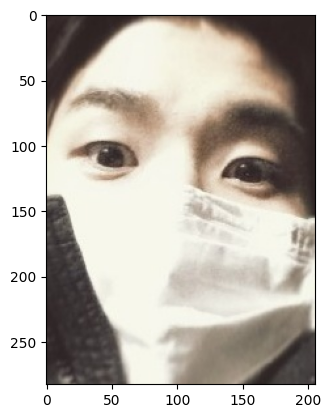

In [14]:
# Showing image with help of path

img = mpimg.imread('/content/data/with_mask/with_mask_1152.jpg')
imgplot = plt.imshow(img)
plt.show()

In [15]:
with_mask_path="/content/data/with_mask/"
without_mask_path="/content/data/without_mask/"

In [16]:
# Storing all images in form of 3-D numpy array to list 'data'

data=[]
for single_image in list_of_masked_images:
  image=cv2.imread(with_mask_path+single_image)
  image=cv2.resize(image,(128,128))
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  image=Image.fromarray(image,'RGB')
  image=np.array(image)
  data.append(image)

for single_image in list_of_unmasked_images:
  image=cv2.imread(without_mask_path+single_image)
  image=cv2.resize(image,(128,128))
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  image=Image.fromarray(image,'RGB')
  image=np.array(image)
  data.append(image)


len(data)




7553

In [17]:
type(data)

list

In [18]:
# Converting to numpy array for training

import numpy as np
X=np.array(data)
y=np.array(label)

y[7546:7552]

array([0, 0, 0, 0, 0, 0])

**Training the model**

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2) # 80 % for training and 20 % for testing

In [20]:
#Scaling for uniformity

X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [21]:
# Architecture of Model

number_of_classes=2;
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3))) # First convulation layer
model.add(MaxPooling2D(2,2))  # First layer of maximum Pooling

model.add(Conv2D(64,(3,3),activation='relu')) # Second convulation layer
model.add(MaxPooling2D(2,2))   # Second layer of maximum Pooling

model.add(Conv2D(128,(3,3),activation='relu')) # Third convulation layer
model.add(MaxPooling2D(2,2))   # Third layer of maximum Pooling

model.add(Flatten()) # Flattening

model.add(Dense(128,activation='relu')) # First fully connected layer
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))  # Second fully connected layer
model.add(Dropout(0.5))

model.add(Dense(number_of_classes,activation='sigmoid'))  # Output layer

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [23]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])  # Compiling the model

In [33]:
h=model.fit(X_train_scaled,y_train,validation_split=0.2,epochs=10)   # Training with 20 % validation data

Epoch 1/10
152/152 [==============================] - 5s 28ms/step - loss: 0.0255 - accuracy: 0.9919 - val_loss: 0.2304 - val_accuracy: 0.9636
Epoch 2/10
152/152 [==============================] - 3s 20ms/step - loss: 0.0038 - accuracy: 0.9988 - val_loss: 0.2822 - val_accuracy: 0.9686
Epoch 3/10
152/152 [==============================] - 3s 20ms/step - loss: 0.0087 - accuracy: 0.9971 - val_loss: 0.2580 - val_accuracy: 0.9562
Epoch 4/10
152/152 [==============================] - 3s 20ms/step - loss: 0.0091 - accuracy: 0.9965 - val_loss: 0.2319 - val_accuracy: 0.9636
Epoch 5/10
152/152 [==============================] - 3s 22ms/step - loss: 0.0029 - accuracy: 0.9990 - val_loss: 0.2731 - val_accuracy: 0.9669
Epoch 6/10
152/152 [==============================] - 3s 21ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.3337 - val_accuracy: 0.9669
Epoch 7/10
152/152 [==============================] - 3s 20ms/step - loss: 0.0272 - accuracy: 0.9928 - val_loss: 0.2612 - val_accuracy: 0.9644

In [34]:
# Evaluating model for test data

loss,acc=model.evaluate(X_test_scaled,y_test)
acc
loss

48/48 [==============================] - 0s 10ms/step - loss: 0.2705 - accuracy: 0.9557


0.2704865336418152

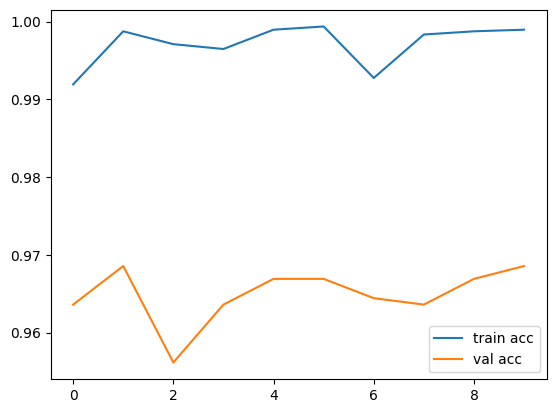

In [35]:
# Visualising accuracy

import matplotlib.pyplot as plt
plt.plot(h.history['accuracy'],label='train acc')
plt.plot(h.history['val_accuracy'],label='val acc')
plt.legend()

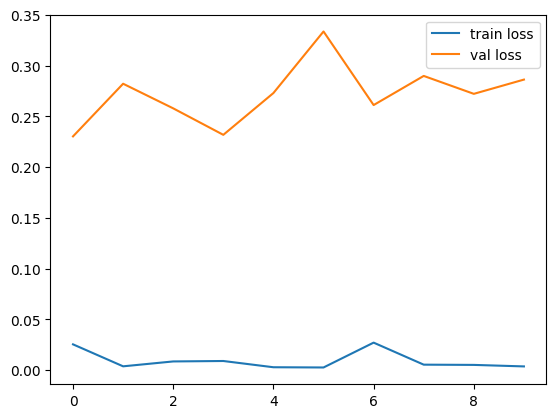

In [36]:
# Visualising  loss

plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='val loss')
plt.legend()

**Prediction for single input image**

Path of the image: /content/data/with_mask/with_mask_2294.jpg


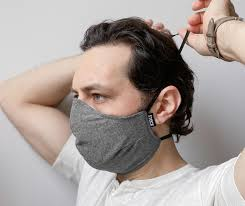

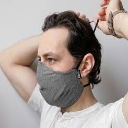

1/1 [==============================] - 1s 1s/step
[[1.2940803e-04 9.1083086e-01]]
masked


In [38]:


input_image = input("Path of the image: ")
input_r_image = cv2.imread(input_image)

# Check if the image was loaded correctly
if input_r_image is None:
    print(f"Error: Unable to load image at {input_image}. Please check the path and try again.")
else:
    cv2_imshow(input_r_image)  # Display the image if it was loaded successfully

    image_sized = cv2.resize(input_r_image, (128, 128))
    cv2_imshow(image_sized)  # Display the resized image

image_sized=cv2.resize(input_r_image,(128,128))
image_scaled=image_sized/255
image_reshaped=np.reshape(image_scaled,[1,128,128,3])
prediction=model.predict(image_reshaped)
print(prediction)
prediction=prediction[0]
if( prediction[0]>prediction[1] and prediction[0]>0.5):
  print("unmasked")
else:
  print("masked")


Path of the image: /content/data/without_mask/without_mask_1029.jpg


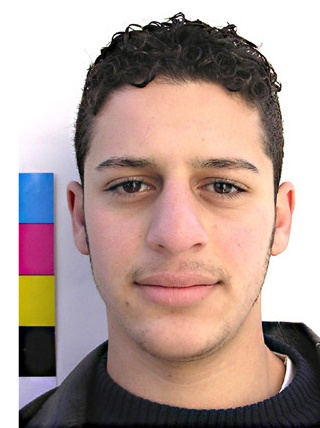

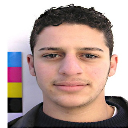

1/1 [==============================] - 0s 20ms/step
[[9.9942076e-01 1.4615943e-08]]
unmasked


In [39]:
input_image = input("Path of the image: ")
input_r_image = cv2.imread(input_image)

# Check if the image was loaded correctly
if input_r_image is None:
    print(f"Error: Unable to load image at {input_image}. Please check the path and try again.")
else:
    cv2_imshow(input_r_image)  # Display the image if it was loaded successfully

    image_sized = cv2.resize(input_r_image, (128, 128))
    cv2_imshow(image_sized)  # Display the resized image

image_sized=cv2.resize(input_r_image,(128,128))
image_scaled=image_sized/255
image_reshaped=np.reshape(image_scaled,[1,128,128,3])
prediction=model.predict(image_reshaped)
print(prediction)
prediction=prediction[0]
if( prediction[0]>prediction[1] and prediction[0]>0.5):
  print("unmasked")
else:
  print("masked")